<a href="https://colab.research.google.com/github/sejongmin/AI/blob/main/%EC%8B%A4%EC%8A%B51_3_%ED%8D%BC%EC%85%89%ED%8A%B8%EB%A1%A0_(library_version).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np

In [ ]:
inputs = np.array([[0,0],[0,1],[1,0],[1,1]], dtype='float32')

targets = np.array([0,1,1,1], dtype='float32')  #OR
#targets = np.array([0,0,0,1], dtype='float32') #AND
#targets = np.array([0,1,1,0], dtype='float32') #XOR

In [ ]:
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

dataset = TensorDataset(inputs, targets)
loader = DataLoader(dataset, batch_size=4)

In [ ]:
linear = torch.nn.Linear(2, 1, bias=True)
sigmoid = torch.nn.Sigmoid()
#층을 늘리려면
#linear2 = ..
#sigmoid = ..
#model = ..(linear, sigmoid, linear2, sigmoid)

In [ ]:
model = torch.nn.Sequential(linear, sigmoid)

In [ ]:
criterion = torch.nn.BCELoss() #Binary Cross Entropy
optimizer = torch.optim.SGD(model.parameters(), lr=1) #lr=학습률, 사용해야하는 gradient도 안에 다 들어있음

In [ ]:
for x,y in dataset:
    preds = model(x)

    print(f'Prediction: {preds.item():.2f} / Actual target: {y.item():.2f}')

Prediction: 0.63 / Actual target: 0.00
Prediction: 0.55 / Actual target: 1.00
Prediction: 0.69 / Actual target: 1.00
Prediction: 0.62 / Actual target: 1.00


In [ ]:
epochs = 1000
for i in range(epochs):
    for x,y in loader:
        # Generate Prediction
        preds = model(x)
        # Get the loss and perform backpropagation
        loss = criterion(preds[:, 0], y)
        loss.backward()
        # Let's update the weights
        optimizer.step()
#    print(f"Epoch {i}/{epochs}: Loss: {loss}")

In [ ]:
for x,y in dataset:
    preds = model(x)

    print(f'Prediction: {preds.item():.2f} / Actual target: {y.item():.2f}')

Prediction: 0.00 / Actual target: 0.00
Prediction: 1.00 / Actual target: 1.00
Prediction: 1.00 / Actual target: 1.00
Prediction: 1.00 / Actual target: 1.00


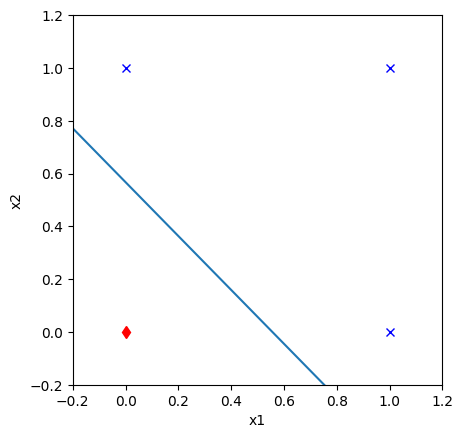

In [ ]:
import matplotlib.pyplot as plt

x1_tmp = np.arange(-0.2,1.3,0.1)
w_tmp = []
for param in model.parameters():
    w_tmp.append(param.data)
x2_tmp = (-w_tmp[0][0,0].numpy()*x1_tmp-w_tmp[1].numpy())/w_tmp[0][0,1].numpy()
fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(len(inputs)):
    if targets[i] == 1:
        plt.plot(inputs[i,0],inputs[i,1],'bx')
    else:
        plt.plot(inputs[i,0],inputs[i,1],'rd')
plt.plot(x1_tmp,x2_tmp)
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.xlabel('x1')
plt.ylabel('x2')
ax.set_aspect('equal')
plt.show()